In [80]:
import torch
import numpy as np
import skrf as rf
import rf_ckt_optimizer


In [81]:
freq = torch.tensor(np.arange(100e6, 2000e6, 1e6),dtype=torch.float32)
rfopt = rf_ckt_optimizer.RFCircuitOptimizer(freq)

In [82]:
cap = torch.tensor(1e-12, dtype=torch.float32, requires_grad=True)
s_mat_cap = rfopt.capacitor(cap)
cap

tensor(1.0000e-12, requires_grad=True)

In [83]:
cap2 = torch.tensor(2e-12, dtype=torch.float32, requires_grad=True)
s_mat_cap2 = rfopt.capacitor(cap2)
s_mat_cap2 = s_mat_cap2.detach()
cap2

tensor(2.0000e-12, requires_grad=True)

In [84]:
optimizer = torch.optim.Adam([cap], lr=5e-14)
loss_fn = rf_ckt_optimizer.MSELoss()
loss = loss_fn(s_mat_cap, s_mat_cap2)
loss

tensor(0.2828, grad_fn=<MeanBackward0>)

In [85]:
for i in range(1000):
    optimizer.zero_grad()
    s_mat_cap = rfopt.capacitor(cap)
    loss = loss_fn(s_mat_cap, s_mat_cap2)
    loss.backward()
    optimizer.step()
    if((i+1)%100 == 0):
        print(f"Iteration {i+1}: Loss: {loss.item()}, cap: {cap.item()}")

Iteration 100: Loss: 0.0003581386408768594, cap: 1.9993169446397285e-12
Iteration 200: Loss: 0.0014406645204871893, cap: 1.996079950633556e-12
Iteration 300: Loss: 7.955304317874834e-05, cap: 1.9940889217640034e-12
Iteration 400: Loss: 0.00027197712915949523, cap: 1.9969169547107146e-12
Iteration 500: Loss: 0.001093370607122779, cap: 1.992543283146908e-12
Iteration 600: Loss: 0.00023515797511208802, cap: 1.999513402073383e-12
Iteration 700: Loss: 0.0013013972202315927, cap: 1.9962365094272627e-12
Iteration 800: Loss: 0.0002909317845478654, cap: 2.0006769678448943e-12
Iteration 900: Loss: 0.00042311279685236514, cap: 2.001376061405713e-12
Iteration 1000: Loss: 0.0023604060988873243, cap: 1.9946991107466783e-12


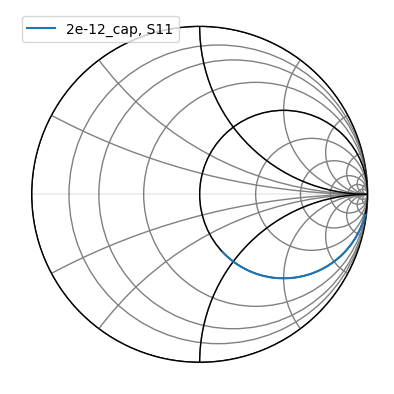

In [86]:
ntwk = rf.Network(frequency=freq.detach().numpy(), s=s_mat_cap.detach().numpy()
                  , name='2e-12_cap')
ntwk.s11.plot_s_smith()


In [ ]:
media = rf.media.DefinedGammaZ0(frequency=rf.Frequency.from_f(freq.detach().numpy()))
cap_ntwk = media.capacitor(2e-12)
cap_ntwk.s11.plot_s_smith(label='DefinedGammaZ0 Capacitor')